User Defined Functions

In [126]:
import os,numpy as np,pandas as pd,math,matplotlib.pyplot as plt


#=================================FUNCTIONS==========================================

def sigmoid(z):
    return 1 / (1 + math.exp(-z))




Main Function

Alphas: [0.0002, 0.0001, 0.14, 2, 10, 25]
Errors: [188.2237721977892, 188.2237721977892, 188.2237721977892, 188.2237721977892, 188.2237721977892, 188.2237721977892]


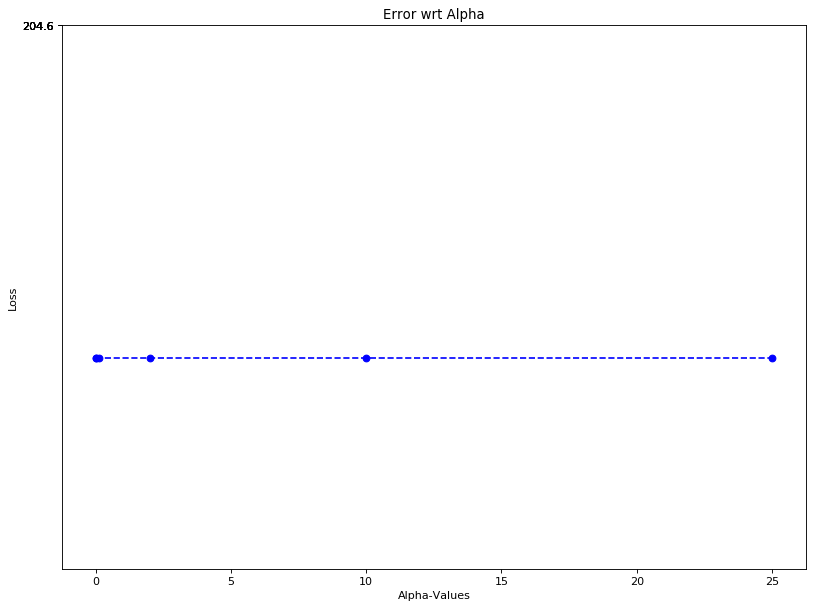

In [138]:
dir = "data"
file = "TicTacToeData.csv"

filename = os.path.join(dir,file)
columns = ['TL','TM','TR','ML','MM','MR','BL','BM','BR','Result']

df = pd.read_csv(filename, names = columns) #b = 0.21 (blank) x = 0.22 (player x) o = 0.23 (player o)
df = df.sample(frac=1).reset_index(drop=True) #shuffling rows
    
    
X = df[['TL','TM','TR','ML','MM','MR','BL','BM','BR']].as_matrix() #features values
X = np.insert(X, 0, 1, axis=1) # b will get mulitplied with 1

m = X.shape[0]

W = np.array([np.random.rand(10)]) # Thetas including b

Y = np.array(df['Result']) # Ground Truth


   

alpha = [0.0002,0.0001,0.14,2,10,25]

A = []
predictions = []
error = []

for i in range(len(alpha)):
    
    predictions = []
    Z = np.dot(W,X.T) 
    
    for col in Z.T:
        predictions.append(sigmoid(col))

    A = np.array(A)
    A = np.asarray(predictions)
    dz = A - Y
    dz = np.array([dz])

    dw = 1/m * np.dot(dz,X)


    db = 1/m * np.sum(dz)



    dw = dw - np.dot(alpha[i],dw) 
    db = db - np.dot(alpha[i],db)

    error.append(abs(dz.sum()))

       
print("Alphas: " + str(alpha))
print("Errors: " + str(error))

plt.figure(num=None, figsize=(12, 9), dpi=80)
plt.plot(alpha, error,'--bo')
plt.title("Error wrt Alpha")
plt.xlabel("Alpha-Values")
plt.ylabel("Loss")
plt.yticks(errors)
plt.show()

